In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import string
def preprocess(t):
  w = word_tokenize(t.lower())
  data = list()
  for word in w:
    if word.lower() not in stop_words:
      data.append(word)
  text = ' '.join(data)
  return text.translate(str.maketrans('','',string.punctuation))

In [ ]:
from textblob import TextBlob
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
def get_polarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
samsung = pd.read_csv('samsung.csv')
samsung.head()

,comment_text,sentiment_polarity,sentiment_label
0,#Samsung mobile device check: *#0*#,0.0000,neutral
1,"Whatâs up, Galaxy owners? You can now win #i...",0.5859,positive
2,ââ½ Selfie Stick Monopod Camera Holder Butt...,0.0000,neutral
3,Samsung plays up Galaxy Note 7's iris scanner ...,0.2263,positive
4,#Latest ##Samsung #Mobile #auctions: Number of...,0.0772,positive


In [ ]:
samsung['comment_text'] = samsung['comment_text'].apply(preprocess)
samsung['subjectivity'] = samsung['comment_text'].apply(get_subjectivity)
samsung['polarity'] = samsung['comment_text'].apply(get_polarity)
samsung.head()

,comment_text,sentiment_polarity,sentiment_label,subjectivity,polarity
0,samsung mobile device check 0,0.0000,neutral,0.000,0.00
1,whatâs galaxy owners win iheartjingleball ti...,0.5859,positive,0.200,0.40
2,ââ½ selfie stick monopod camera holder butt...,0.0000,neutral,0.000,0.00
3,samsung plays galaxy note 7 iris scanner cnet ...,0.2263,positive,0.000,0.00
4,latest samsung mobile auctions number view 1 r...,0.0772,positive,0.575,0.25


<Axes: ylabel='sentiment'>

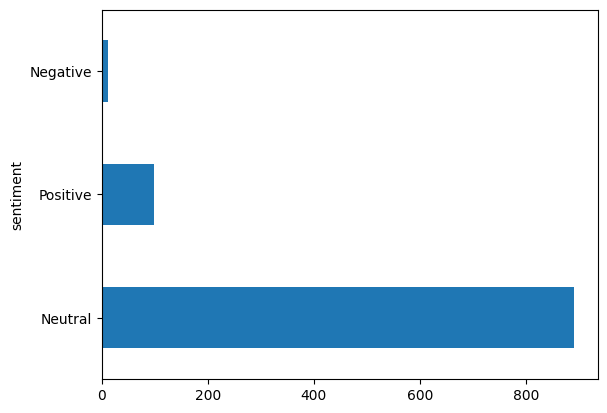

In [ ]:
threshold = 0.5
samsung['sentiment'] = samsung['polarity'].apply(lambda x:'Positive' if x >= threshold else('Negative' if x< -threshold else 'Neutral'))
samsung['sentiment'].value_counts().plot.barh()

In [ ]:
apple = pd.read_csv('apple.csv')
apple.head()

,comment_text,sentiment_polarity,sentiment_label
0,Platinum Car Charger for Samsung Mobile Featur...,0.0000,neutral
1,We just had to do it!! :) ;) :)\n\nMinecraft V...,0.8168,positive
2,Samsung's Next-Gen Smartwatch Could Offer Mobi...,0.0000,neutral
3,Hype Video Broadcast App Has Niche Potential\n...,0.0000,neutral
4,The radiation that can cause cancer from Samsu...,-0.8070,negative


In [ ]:
apple['comment_text'] = apple['comment_text'].apply(preprocess)
apple['subjectivity'] = apple['comment_text'].apply(get_subjectivity)
apple['polarity'] = apple['comment_text'].apply(get_polarity)
apple.head()

,comment_text,sentiment_polarity,sentiment_label,subjectivity,polarity
0,platinum car charger samsung mobile feature ce...,0.0000,neutral,0.0,0.0
1,minecraft vr virtual reality samsung ...,0.8168,positive,0.0,0.0
2,samsung s nextgen smartwatch could offer mobil...,0.0000,neutral,0.0,0.0
3,hype video broadcast app niche potential nexv...,0.0000,neutral,1.0,0.0
4,radiation cause cancer samsung mobile phones r...,-0.8070,negative,0.0,0.0


<Axes: ylabel='sentiment'>

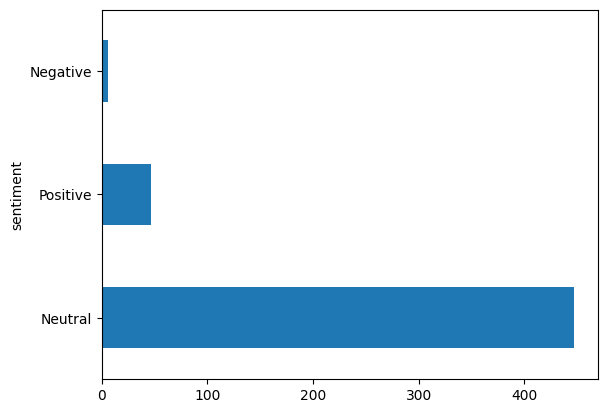

In [ ]:
threshold = 0.5
apple['sentiment'] = apple['polarity'].apply(lambda x:'Positive' if x >= threshold else('Negative' if x< -threshold else 'Neutral'))
apple['sentiment'].value_counts().plot.barh()

In [ ]:
samsung_sentiments = samsung.groupby('sentiment')['sentiment'].count()
samsung_sentiments

sentiment
Negative     11
Neutral     891
Positive     98
Name: sentiment, dtype: int64

In [ ]:
apple_sentiments = apple.groupby('sentiment')['sentiment'].count()
apple_sentiments

sentiment
Negative      6
Neutral     447
Positive     47
Name: sentiment, dtype: int64

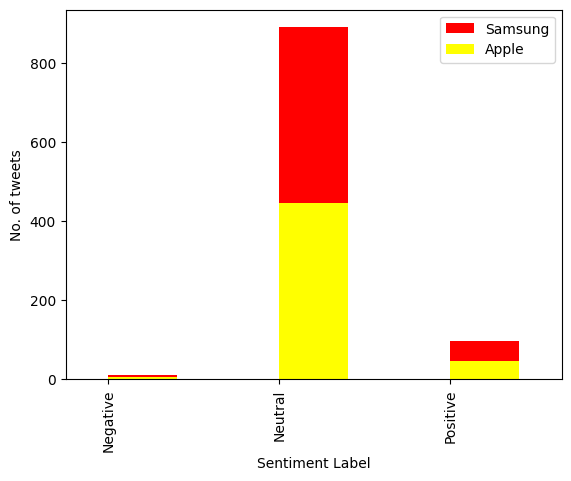

In [ ]:
colors = ['Red','Yellow','blue']
fig,ax = plt.subplots()
samsung_sentiments.plot(kind='bar',ax=ax,position=0,width=0.4,label='Samsung',color=colors[0])
apple_sentiments.plot(kind='bar',ax=ax,position=0,width=0.4,label='Apple',color=colors[1])
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('No. of tweets')
ax.legend()
plt.show()